In [1]:
import pandas as pd
import numpy as np

file_path = 'GeneralAviationDashboard_Data_20221208_Public.xlsx'
accidents_df = pd.read_excel(file_path, sheet_name='Accidents')
findings_df = pd.read_excel(file_path, sheet_name='Findings')

In [3]:
# Filtering accidents in Alaska and in the United States (excluding Alaska and Hawaii)
# Also filtering for 'FatalInjuries' > 0 and 'SeriousInjuries' > 0

# Alaska accidents
alaska_accidents = accidents_df[(accidents_df['StateOrRegion'] == 'Alaska') & 
                                ((accidents_df['FatalInjuries'] > 0) | (accidents_df['SeriousInjuries'] > 0))]

# US accidents (excluding Alaska and Hawaii)
us_accidents = accidents_df[(accidents_df['Country'] == 'United States') & 
                            (accidents_df['StateOrRegion'] != 'Alaska') & 
                            (accidents_df['StateOrRegion'] != 'Hawaii') & 
                            ((accidents_df['FatalInjuries'] > 0) | (accidents_df['SeriousInjuries'] > 0))]

# Count of accidents
alaska_accidents_count = len(alaska_accidents)
us_accidents_count = len(us_accidents)

(107, 3411)

In [17]:
# Merging the accidents data with the findings data based on MKey, for both Alaska and US accidents
alaska_findings = pd.merge(alaska_accidents, findings_df, on='MKey')
us_findings = pd.merge(us_accidents, findings_df, on='MKey')

# Dropping duplicate MKey for each unique Category for both Alaska and US
alaska_unique_categories = alaska_findings.drop_duplicates(subset=['MKey', 'Category'])
us_unique_categories = us_findings.drop_duplicates(subset=['MKey', 'Category'])

# Count of each category for Alaska and US
category_counts_alaska = alaska_unique_categories['Category'].value_counts()
category_counts_us = us_unique_categories['Category'].value_counts()

# Calculating percentages
category_percentage_alaska = (category_counts_alaska / alaska_accidents_count) * 100
category_percentage_us = (category_counts_us / us_accidents_count) * 100

# Creating a DataFrame for plotting
categories_comparison_df = pd.DataFrame({'Alaska': category_percentage_alaska, 'US': category_percentage_us}).fillna(0)

categories_comparison_df.head()


,Alaska,US
Category,,
Personnel issues,84.112150,79.859279
Aircraft,57.943925,71.855761
Environmental issues,44.859813,39.108766
Not determined,14.018692,12.664908
Organizational issues,3.738318,2.022867


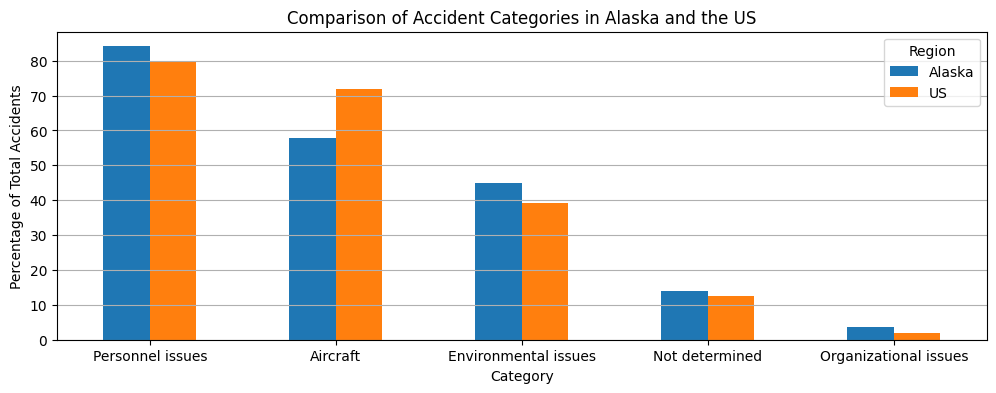

In [15]:
import matplotlib.pyplot as plt

# Plotting the data as side by side bars on a bar chart
categories_comparison_df.plot(kind='bar', figsize=(12, 4))

plt.title('Comparison of Accident Categories in Alaska and the US')
plt.xlabel('Category')
plt.ylabel('Percentage of Total Accidents')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.grid(axis='y')

plt.show()

#! Note that percentages will not add up to 100 because multiple factors can be involved in a single accident.